<a href="https://colab.research.google.com/github/Sreraj/CODSOFT/blob/main/CodSoft_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 2 :  CUSTOMER CHURN PREDICTION**

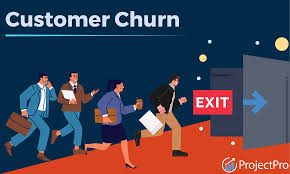

In [ ]:
from IPython.display import Image,display
display(Image("/content/customer.jpeg" , width=600 ,height = 300))

Import All Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
# Load top 5 rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Load Bottom 5 rows of the dataset
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
# No of Rows and Columns

print("Number of rows :" , df.shape[0])
print("Number of columns : " , df.shape[1])

Number of rows : 10000
Number of columns :  14


In [ ]:
#  info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Check Missing values

df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Check Duplicate value

df.duplicated().sum()

0

In [ ]:
# Drop irrelavant columns

df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**EDA**

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


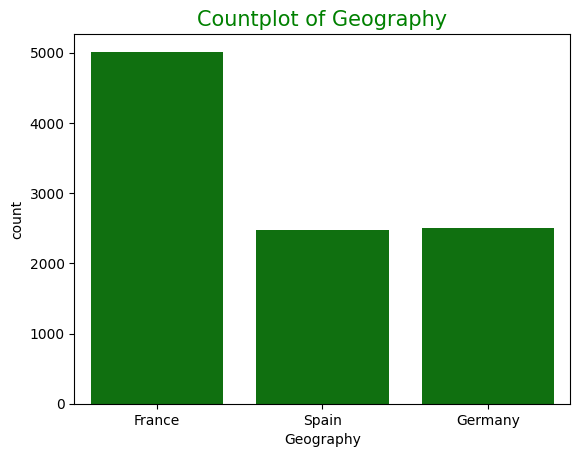

In [ ]:
# Countplot of Geography
sns.countplot(x='Geography',data=df,color='g')
plt.title("Countplot of Geography",size=15,color='g')
plt.show()

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


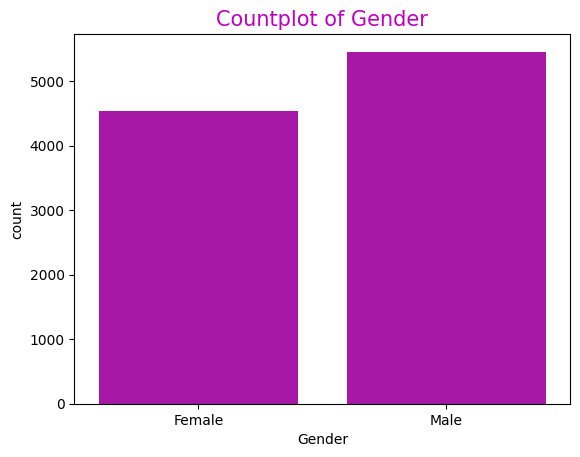

In [ ]:
sns.countplot(x='Gender',data=df,color='m')
plt.title("Countplot of Gender",size=15,color='m')
plt.show()

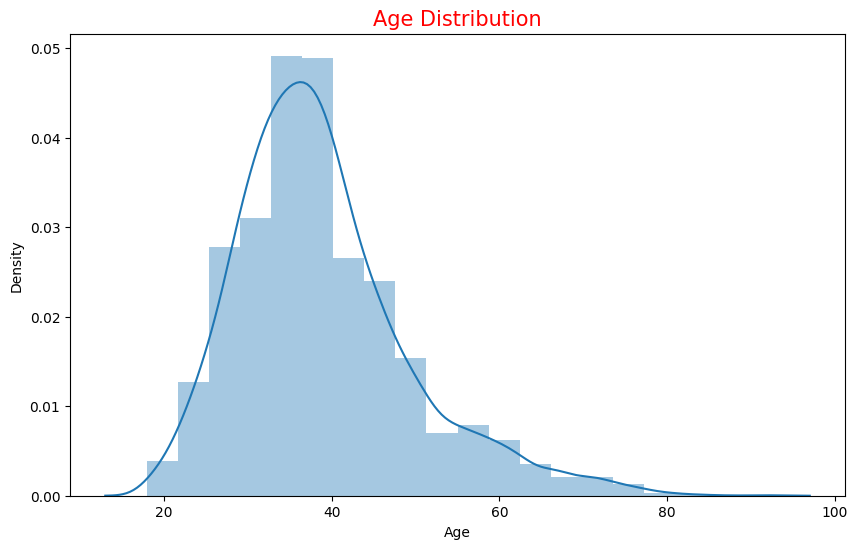

In [ ]:
# Age distribution
plt.figure(figsize=(10,6))
sns.distplot(df['Age'],bins=20,kde=True)
plt.title("Age Distribution",size=15,color='r')
plt.show()

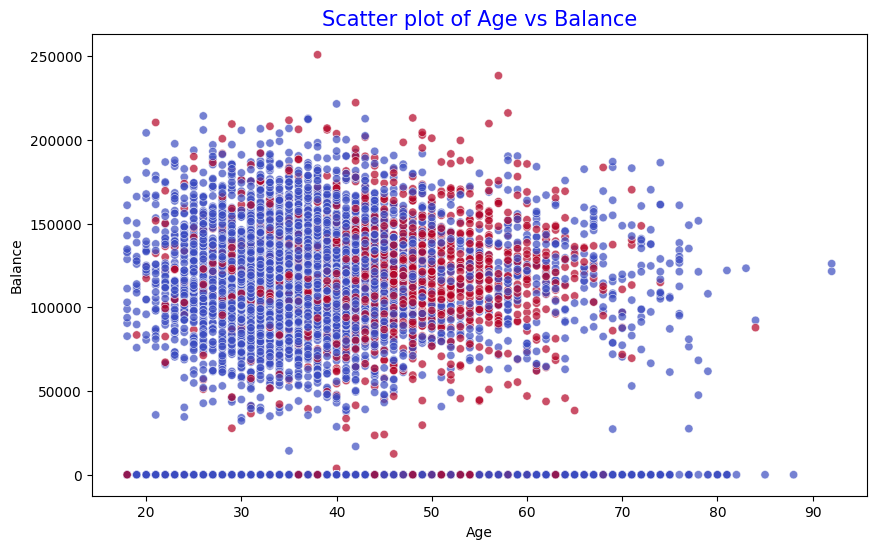

In [ ]:
# Scatter plot of Age vs Balance
plt.figure(figsize=(10,6))
a =sns.scatterplot(x='Age',y='Balance',c=df["Exited"],data=df,cmap='coolwarm',alpha=0.7)
plt.title("Scatter plot of Age vs Balance",size=15,color='b')
plt.show()

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


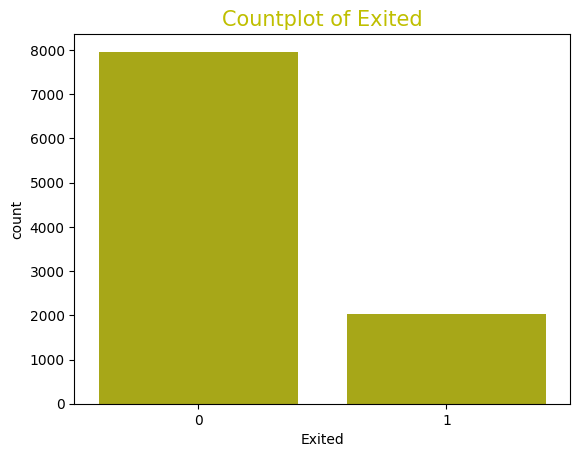

In [ ]:
sns.countplot(x='Exited',data=df,color='y')
plt.title("Countplot of Exited",size=15,color='y')
plt.show()

 * Data is imbalanced

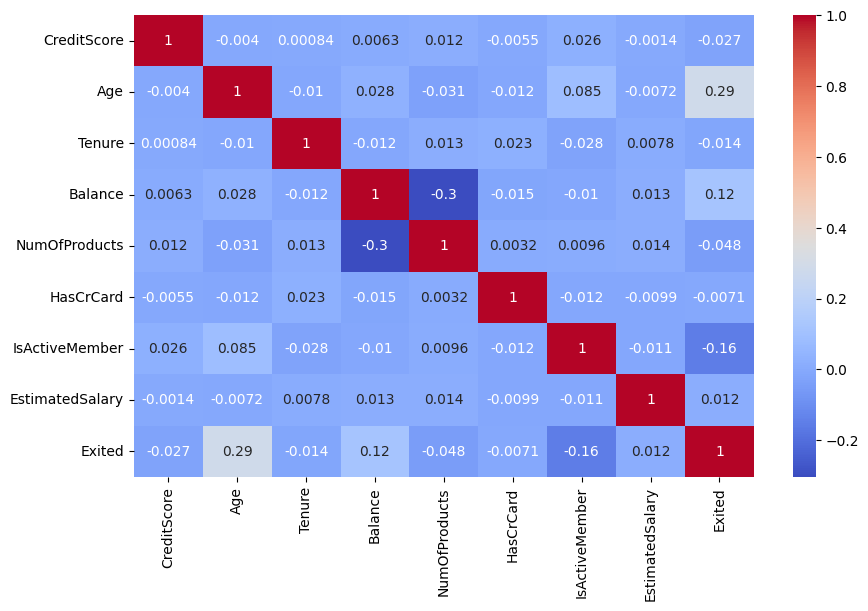

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot =True,cmap='coolwarm')
plt.show()

In [ ]:
# Encoding

le = LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])
df['Geography']= le.fit_transform(df['Geography'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Split the input and output data

x = df.drop('Exited',axis=1)
y = df['Exited']

In [ ]:
# Balancing the data

from imblearn.over_sampling import SMOTE
smo = SMOTE()
x_smo,y_smo = smo.fit_resample(x,y)

In [ ]:
y_smo.value_counts()

,count
Exited,
1,7963
0,7963


In [ ]:
# Train - Test Split

x_train,x_test,y_train,y_test = train_test_split(x_smo,y_smo,test_size=0.3,random_state=42)

In [ ]:
# Model Creation

lr = LogisticRegression(random_state = 42)
rf = RandomForestClassifier(n_estimators=100,random_state=42)
gb = GradientBoostingClassifier(n_estimators=100)


In [ ]:
model = [lr,rf,gb]

for i in model:
  print("Model is ",i)
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print("Confusion matrix is : ",confusion_matrix(y_test,y_pred))
  print("Accuracy_score is : ",accuracy_score(y_test,y_pred))
  print("Classification report is : ",classification_report(y_test,y_pred))
  print("*"*200)
  print("\n")

Model is  LogisticRegression(random_state=42)
Confusion matrix is :  [[1613  813]
 [ 705 1647]]
Accuracy_score is :  0.6822938467978233
Classification report is :                precision    recall  f1-score   support

           0       0.70      0.66      0.68      2426
           1       0.67      0.70      0.68      2352

    accuracy                           0.68      4778
   macro avg       0.68      0.68      0.68      4778
weighted avg       0.68      0.68      0.68      4778

********************************************************************************************************************************************************************************************************


Model is  RandomForestClassifier(random_state=42)
Confusion matrix is :  [[2052  374]
 [ 314 2038]]
Accuracy_score is :  0.8560066973629133
Classification report is :                precision    recall  f1-score   support

           0       0.87      0.85      0.86      2426
           1       0.84      

In [ ]:
df1 = pd.DataFrame({'Algorithm':["Logistic Regression","Random Forest Classifier","Gradient Boosting Classifier"],'% of Accuracy':[73,85,83]})
df1

,Algorithm,% of Accuracy
0,Logistic Regression,73
1,Random Forest Classifier,85
2,Gradient Boosting Classifier,83


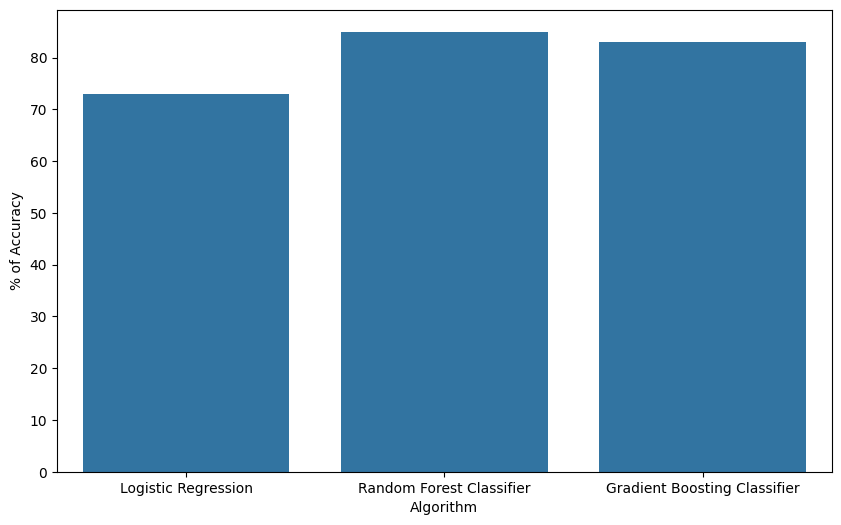

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm',y='% of Accuracy',data=df1)
plt.show()